In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import os

# Set random seed for reproducibility
torch.manual_seed(1)
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'


In [2]:
def train_model(model, inputs, targets):
    max_epochs = 2000
    epoch_list, loss_list = [], []
    converged = False
    current_epoch = 0
    gradient_list = []

    while not converged:
        current_epoch += 1
        predictions = model(inputs)
        loss_value = loss_function(predictions, targets)
        optimizer.zero_grad()  # Reset gradients for the next iteration
        loss_value.backward()   # Calculate gradients using backpropagation
        optimizer.step()
        
        epoch_list.append(current_epoch)
        loss_list.append(loss_value.detach().numpy())

        total_gradient = 0.0
        for param in model.parameters():
            param_gradient = 0.0
            if param.grad is not None:
                param_gradient = (param.grad.cpu().data.numpy()**2).sum()
            total_gradient += param_gradient
        gradient_norm = total_gradient ** 0.5
        
        gradient_list.append(gradient_norm)
        
        if current_epoch % 100 == 0: 
            print(f'Epoch: {current_epoch}, Loss = {loss_value.item():.4f}')
                
        if current_epoch == max_epochs:
            print("Maximum Epoch Limit Reached")
            converged = True

        elif (current_epoch > 5) and (loss_list[-1] < 0.001):
            if abs(loss_list[-3] - loss_list[-2]) < 1.0e-05 and abs(loss_list[-2] - loss_list[-1]) < 1.0e-05:
                print("Convergence achieved for loss:", loss_list[-1])
                converged = True
                
    return epoch_list, loss_list, predictions, gradient_list


In [3]:
# Prepare the input data
input_data = np.expand_dims(np.arange(-1.5, 1.5, 0.01), 1)
print(input_data.shape)
output_data = np.sinc(5 * input_data)
print(output_data.shape)


(300, 1)
(300, 1)


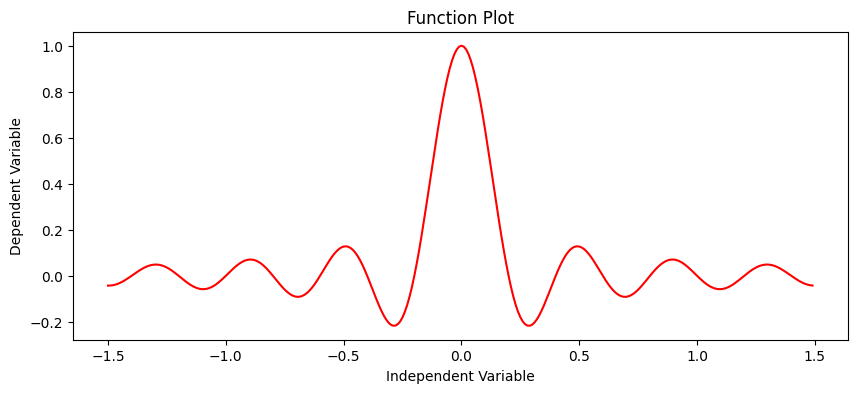

In [4]:
# Convert numpy arrays to torch tensors
inputs_tensor, targets_tensor = torch.tensor(input_data, dtype=torch.float32), torch.tensor(output_data, dtype=torch.float32)

# Plot the function
plt.figure(figsize=(10, 4))
plt.plot(inputs_tensor, targets_tensor, color="red")
plt.title('Function Plot')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.show()


In [5]:
class NeuralNetworkModel(nn.Module):
    def __init__(self):
        super(NeuralNetworkModel, self).__init__()
        self.layer1 = nn.Linear(1, 5)
        self.layer2 = nn.Linear(5, 10)
        self.layer3 = nn.Linear(10, 10)
        self.layer4 = nn.Linear(10, 10)
        self.layer5 = nn.Linear(10, 10)
        self.layer6 = nn.Linear(10, 10)
        self.layer7 = nn.Linear(10, 5)
        self.output_layer = nn.Linear(5, 1)
    
    def forward(self, x):
        x = nn.functional.leaky_relu(self.layer1(x))
        x = nn.functional.leaky_relu(self.layer2(x))
        x = nn.functional.leaky_relu(self.layer3(x))
        x = nn.functional.leaky_relu(self.layer4(x))
        x = nn.functional.leaky_relu(self.layer5(x))
        x = nn.functional.leaky_relu(self.layer6(x))
        x = nn.functional.leaky_relu(self.layer7(x))
        x = self.output_layer(x)
        return x


In [6]:
# Initialize model, optimizer, and loss function
neural_model = NeuralNetworkModel()
optimizer = torch.optim.Adam(neural_model.parameters(), lr=1e-3, weight_decay=1e-4)
loss_function = torch.nn.MSELoss()  # Mean Squared Error Loss

# Count the total number of parameters in the model
total_parameters = sum(param.numel() for param in neural_model.parameters())
print(total_parameters)

# Train the model and obtain results
epochs_record, losses_record, predictions_record, gradients_record = train_model(neural_model, inputs_tensor, targets_tensor)


571
Epoch: 100, Loss = 0.0774
Epoch: 200, Loss = 0.0607
Epoch: 300, Loss = 0.0524
Epoch: 400, Loss = 0.0387
Epoch: 500, Loss = 0.0048
Epoch: 600, Loss = 0.0030
Epoch: 700, Loss = 0.0023
Epoch: 800, Loss = 0.0022
Epoch: 900, Loss = 0.0022
Epoch: 1000, Loss = 0.0022
Epoch: 1100, Loss = 0.0022
Epoch: 1200, Loss = 0.0022
Epoch: 1300, Loss = 0.0022
Epoch: 1400, Loss = 0.0022
Epoch: 1500, Loss = 0.0022
Epoch: 1600, Loss = 0.0022
Epoch: 1700, Loss = 0.0022
Epoch: 1800, Loss = 0.0022
Epoch: 1900, Loss = 0.0022
Epoch: 2000, Loss = 0.0022
Maximum Epoch Limit Reached


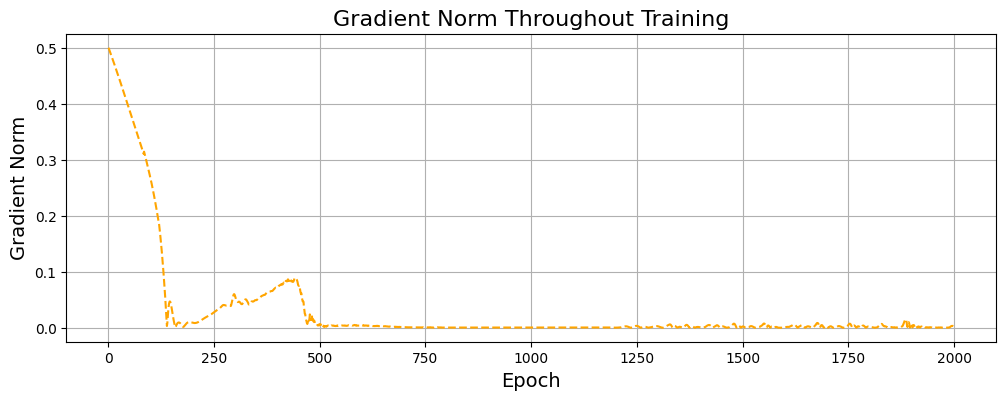

In [16]:
# Plot gradient norm over epochs
plt.figure(figsize=(12, 4))
plt.plot(epochs_record, gradients_record, color="orange", linestyle='--')
plt.title('Gradient Norm Throughout Training', fontsize=16)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Gradient Norm", fontsize=14)
plt.grid(True)
plt.show()


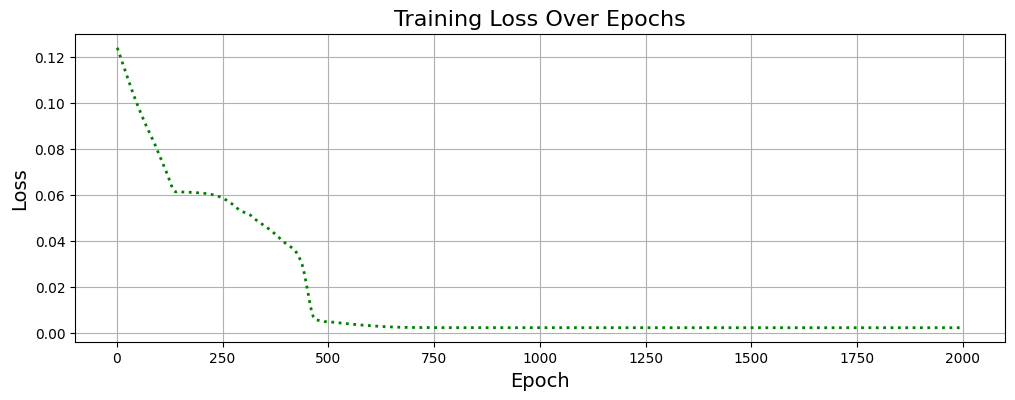

In [17]:
# Plot loss over epochs
plt.figure(figsize=(12, 4))
plt.plot(epochs_record, losses_record, color="green", linestyle=':', linewidth=2)
plt.title('Training Loss Over Epochs', fontsize=16)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Loss", fontsize=14)
plt.grid(True)
plt.show()

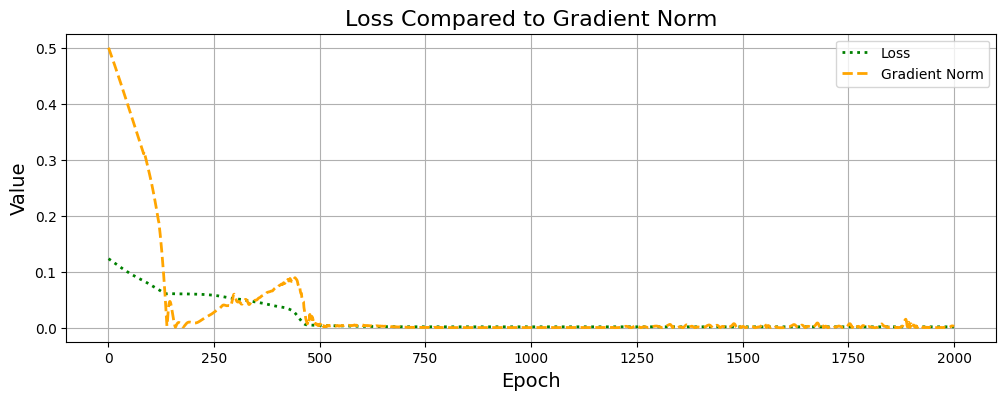

In [18]:
# Plot Loss vs Gradient Norm
plt.figure(figsize=(12, 4))
plt.plot(epochs_record, losses_record, label='Loss', color='green', linestyle=':', linewidth=2)
plt.plot(epochs_record, gradients_record, label='Gradient Norm', color='orange', linestyle='--', linewidth=2)
plt.title('Loss Compared to Gradient Norm', fontsize=16)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Value", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()
